In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
def get_poly(X, poly=2):
    X_old = X.copy()
    for i in range(2, poly + 1):
        X = np.concatenate([X, X_old ** i], axis=1)
    return X

In [3]:
data = pd.read_csv(r'Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [14]:
data['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes').astype('int8')

In [16]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [17]:
x = data.drop(['Performance Index'], axis=1)
y = data['Performance Index']

In [33]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print(x_train, x_train.shape)
print(x_test, x_test.shape)
print(y_train, y_train.shape)
print(y_test, y_test.shape)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced
9254              5               49                           0            7                                 5
1561              2               48                           1            7                                 6
1670              2               81                           0            7                                 2
6087              2               46                           0            6                                 1
6669              8               47                           0            9                                 0
...             ...              ...                         ...          ...                               ...
5734              8               50                           1            6                                 6
5191              4               68                           0            9                           

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(4.082628398521853, 0.9889832909573145)

In [21]:
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301], shape=(2000,))

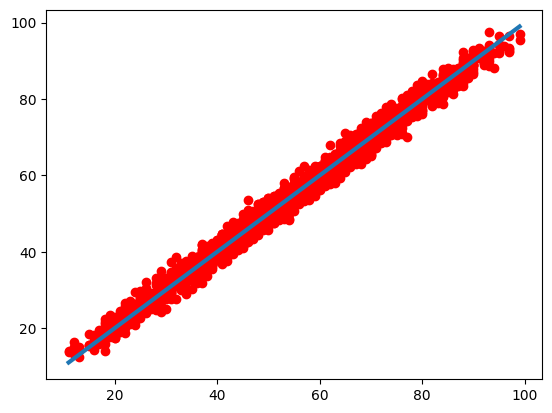

In [31]:
plt.scatter(y_test, y_pred, color="red");
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=3);

In [35]:
mse = []
for i in range(1, 11):
    X = get_poly(x, i)
    model_poly = LinearRegression()
    model_poly.fit(X, y)
    y_p = model_poly.predict(X)
    mse.append(mean_squared_error(y, y_p))

Text(0.5, 1.0, 'Elbow method (MSE)')

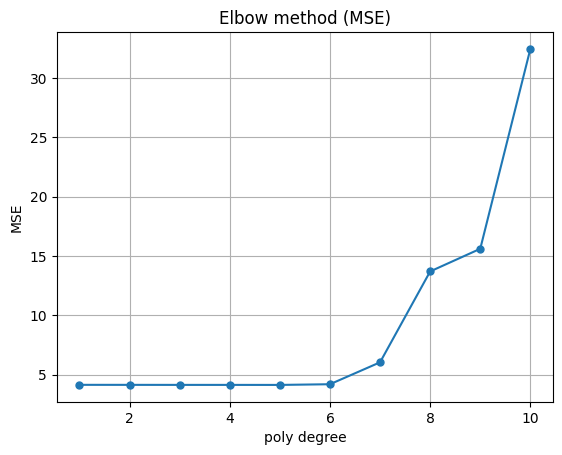

In [36]:
plt.plot(range(1, 11), mse, marker=".", markersize="10"),
plt.grid()
plt.xlabel("poly degree")
plt.ylabel("MSE")
plt.title("Elbow method (MSE)")

6.048308246155168


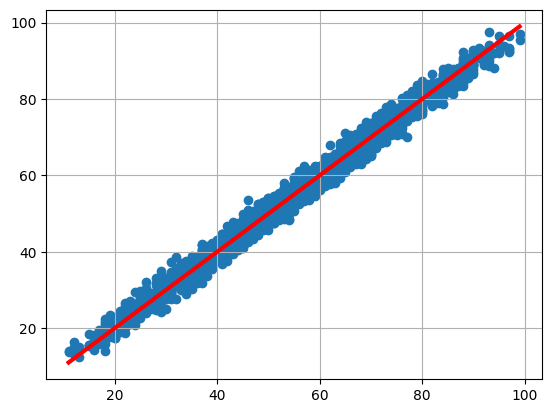

In [44]:
X = get_poly(x, 7)
model_poly = LinearRegression()
model_poly.fit(X, y)
y_p = model_poly.predict(X)
print(mean_squared_error(y, y_p))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=3, color="red")
plt.grid()